In [200]:
import json
import urllib.request
import pandas as pd
import datetime

In [201]:
# list of days
day = datetime.datetime(2020, 3, 1)
end = datetime.datetime(2020, 8, 4)
step = datetime.timedelta(days = 1)

days = []

while day < end:
    days.append(day.strftime('%Y-%m-%d'))
    day += step

# Cases

In [202]:
LINK = 'https://epistat.sciensano.be/Data/COVID19BE_CASES_AGESEX.json'
with urllib.request.urlopen(LINK) as url:
    data = json.loads(url.read().decode())

In [203]:
cases = pd.DataFrame(index = days, columns = ['Alles', 'Westvlaanderen', 'Oostvlaanderen', 'Antwerpen'])
cases[['Alles', 'Westvlaanderen', 'Oostvlaanderen', 'Antwerpen']] = [0, 0, 0 ,0]
for record in data:
    try: 
        cases.at[record['DATE'], 'Alles'] += record['CASES']
        if(record['PROVINCE'] == 'WestVlaanderen'): 
            cases.at[record['DATE'], 'Westvlaanderen'] += record['CASES']
        if(record['PROVINCE'] == 'OostVlaanderen'): 
            cases.at[record['DATE'], 'Oostvlaanderen'] += record['CASES']
        if(record['PROVINCE'] == 'Antwerpen'): 
            cases.at[record['DATE'], 'Antwerpen'] += record['CASES']
    except: 
        pass
        #print(record)

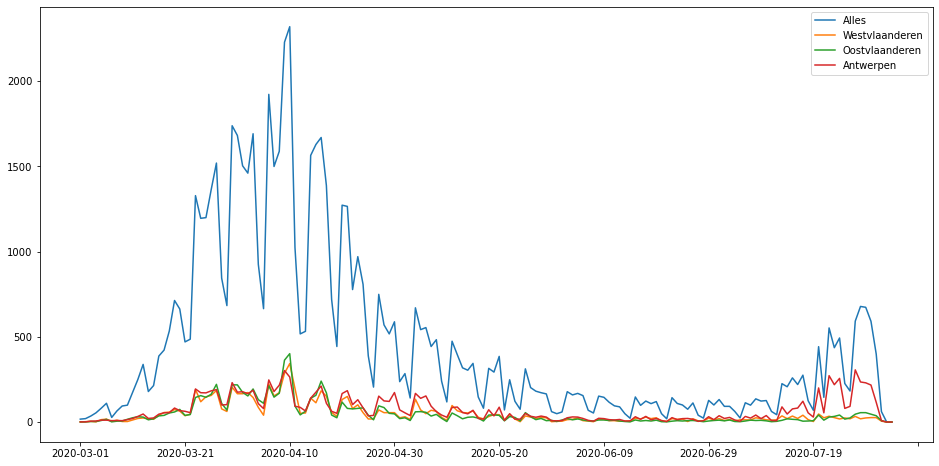

In [204]:
cases.plot(figsize = (16, 8));

In [205]:
LINK = 'https://epistat.sciensano.be/Data/COVID19BE_HOSP.json'
with urllib.request.urlopen(LINK) as url:
    data = json.loads(url.read().decode())

In [206]:
hospitalisations = pd.DataFrame(index = days, columns = ['Alles', 'Westvlaanderen', 'Oostvlaanderen', 'Antwerpen'])
hospitalisations[['Alles', 'Westvlaanderen', 'Oostvlaanderen', 'Antwerpen']] = [0, 0, 0 ,0]
for record in data:
    try: 
        hospitalisations.at[record['DATE'], 'Alles'] += record['TOTAL_IN']
        if(record['PROVINCE'] == 'WestVlaanderen'): 
            hospitalisations.at[record['DATE'], 'Westvlaanderen'] += record['TOTAL_IN']
        if(record['PROVINCE'] == 'OostVlaanderen'): 
            hospitalisations.at[record['DATE'], 'Oostvlaanderen'] += record['TOTAL_IN']
        if(record['PROVINCE'] == 'Antwerpen'): 
            hospitalisations.at[record['DATE'], 'Antwerpen'] += record['TOTAL_IN']
    except: 
        pass
        #print(record)

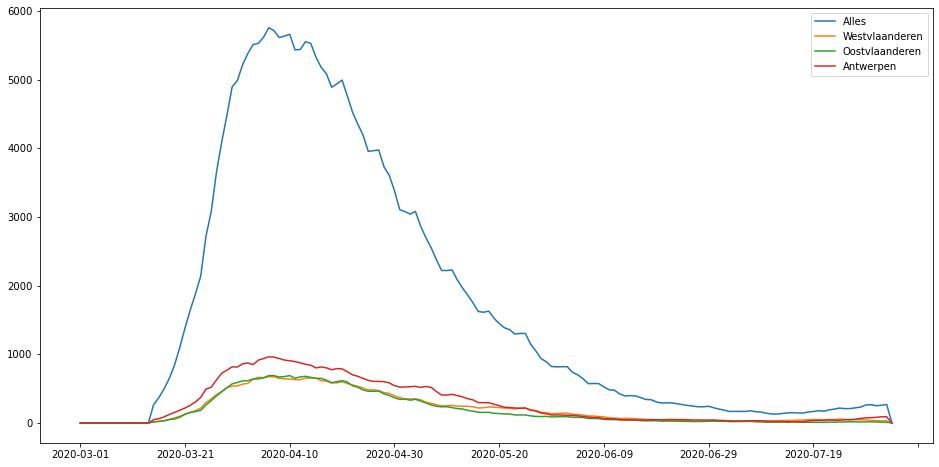

In [207]:
hospitalisations.plot(figsize = (16, 8));